In [1]:
library(tidyverse)
library(fable)
library(tsibble)
library(readxl)
library(dplyr)
library(ggplot2)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: fabletools


Attaching package: 'tsibble'


The following object is masked from 'package:lubridate':

    interval


The following objects are masked from 'package:base':

    intersect, setdiff, union




In [2]:
df <- read_csv("World Energy Consumption.csv")
df

Rows: 22012 Columns: 129
-- Column specification --------------------------------------------------------
Delimiter: ","
chr   (2): country, iso_code
dbl (127): year, population, gdp, biofuel_cons_change_pct, biofuel_cons_chan...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASEAN (Ember),2000,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
ASEAN (Ember),2001,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
ASEAN (Ember),2002,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
ASEAN (Ember),2003,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
ASEAN (Ember),2004,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.00,NA,0.000,NA
ASEAN (Ember),2005,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.02,NA,0.004,NA
ASEAN (Ember),2006,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.05,NA,0.009,NA
ASEAN (Ember),2007,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.06,NA,0.011,NA
ASEAN (Ember),2008,NA,NA,NA,NA,NA,NA,NA,NA,...,0.000,NA,NA,NA,NA,NA,0.06,NA,0.010,NA


In [3]:
str(df)

spc_tbl_ [22,012 x 129] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country                                     : chr [1:22012] "ASEAN (Ember)" "ASEAN (Ember)" "ASEAN (Ember)" "ASEAN (Ember)" ...
 $ year                                        : num [1:22012] 2000 2001 2002 2003 2004 ...
 $ iso_code                                    : chr [1:22012] NA NA NA NA ...
 $ population                                  : num [1:22012] NA NA NA NA NA NA NA NA NA NA ...
 $ gdp                                         : num [1:22012] NA NA NA NA NA NA NA NA NA NA ...
 $ biofuel_cons_change_pct                     : num [1:22012] NA NA NA NA NA NA NA NA NA NA ...
 $ biofuel_cons_change_twh                     : num [1:22012] NA NA NA NA NA NA NA NA NA NA ...
 $ biofuel_cons_per_capita                     : num [1:22012] NA NA NA NA NA NA NA NA NA NA ...
 $ biofuel_consumption                         : num [1:22012] NA NA NA NA NA NA NA NA NA NA ...
 $ biofuel_elec_per_capita                     : num

In [4]:
# Seleccionar columnas por nombre
# Columnas seleccionadas
selected_columns <- c('country', 'year', 'biofuel_consumption', 'biofuel_electricity', 'biofuel_share_energy', 'wind_consumption', 'wind_electricity', 'wind_share_energy')

# Crear un nuevo dataframe con las columnas seleccionadas
column_df <- subset(df, select = selected_columns)
column_df

country,year,biofuel_consumption,biofuel_electricity,biofuel_share_energy,wind_consumption,wind_electricity,wind_share_energy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASEAN (Ember),2000,NA,5.60,NA,NA,0.00,NA
ASEAN (Ember),2001,NA,6.02,NA,NA,0.00,NA
ASEAN (Ember),2002,NA,6.06,NA,NA,0.00,NA
ASEAN (Ember),2003,NA,6.69,NA,NA,0.00,NA
ASEAN (Ember),2004,NA,7.57,NA,NA,0.00,NA
ASEAN (Ember),2005,NA,7.94,NA,NA,0.02,NA
ASEAN (Ember),2006,NA,7.76,NA,NA,0.05,NA
ASEAN (Ember),2007,NA,9.44,NA,NA,0.06,NA
ASEAN (Ember),2008,NA,9.72,NA,NA,0.06,NA


In [5]:
# Continents y años seleccionados
selected_continents <- c('Asia', 'Europe', 'North America (EI)')
selected_years <- 2000:2022

# Filtrar filas basadas en continentes y años seleccionados
rows_df <- column_df %>%
  filter(country %in% selected_continents & year %in% selected_years)

rows_df

country,year,biofuel_consumption,biofuel_electricity,biofuel_share_energy,wind_consumption,wind_electricity,wind_share_energy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asia,2000,0.000,25.91,0.000,7.045,2.370,0.019
Asia,2001,0.000,26.94,0.000,9.402,3.180,0.025
Asia,2002,11.058,28.62,0.028,10.129,3.460,0.025
Asia,2003,13.620,30.16,0.032,13.324,4.580,0.031
Asia,2004,15.678,32.36,0.033,23.483,8.010,0.050
Asia,2005,19.186,38.84,0.038,29.352,10.070,0.058
Asia,2006,24.980,42.09,0.046,45.691,16.060,0.085
Asia,2007,29.120,50.10,0.051,60.314,21.160,0.106
Asia,2008,38.490,54.93,0.065,91.668,32.570,0.156


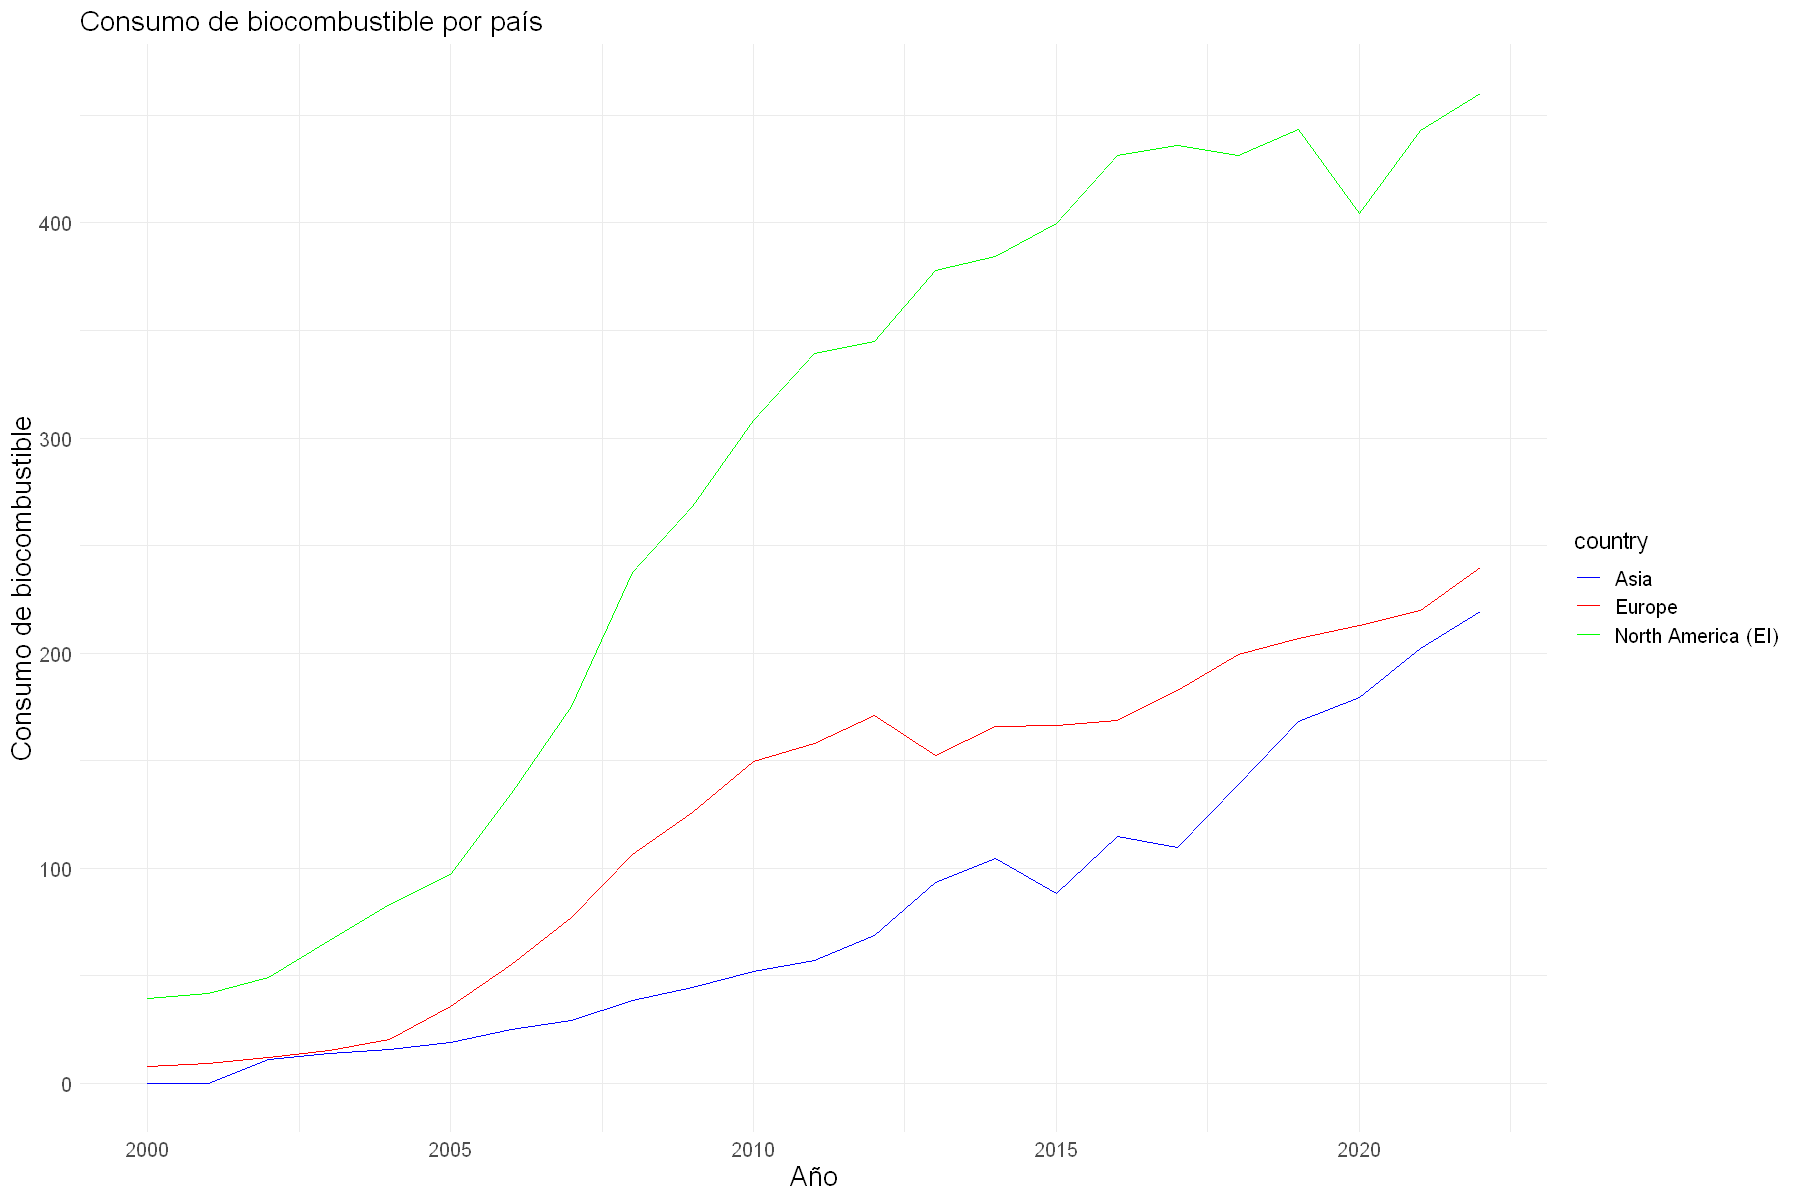

In [6]:
# Crear la gráfica de serie de tiempo
options(repr.plot.width=15, repr.plot.height=10)

ggplot(rows_df, aes(x = year, y = biofuel_consumption, color = country)) +
  geom_line() +
  labs(title = "Consumo de biocombustible por país",
       x = "Año", y = "Consumo de biocombustible") +
  scale_color_manual(values = c("Asia" = "blue", "Europe" = "red", "North America (EI)" = "green")) +
  theme_minimal() +
  theme(
    text = element_text(size = 14), 
    axis.title = element_text(size = 16), 
    axis.text = element_text(size = 12),  
    legend.title = element_text(size = 14), 
    legend.text = element_text(size = 12)  
  )


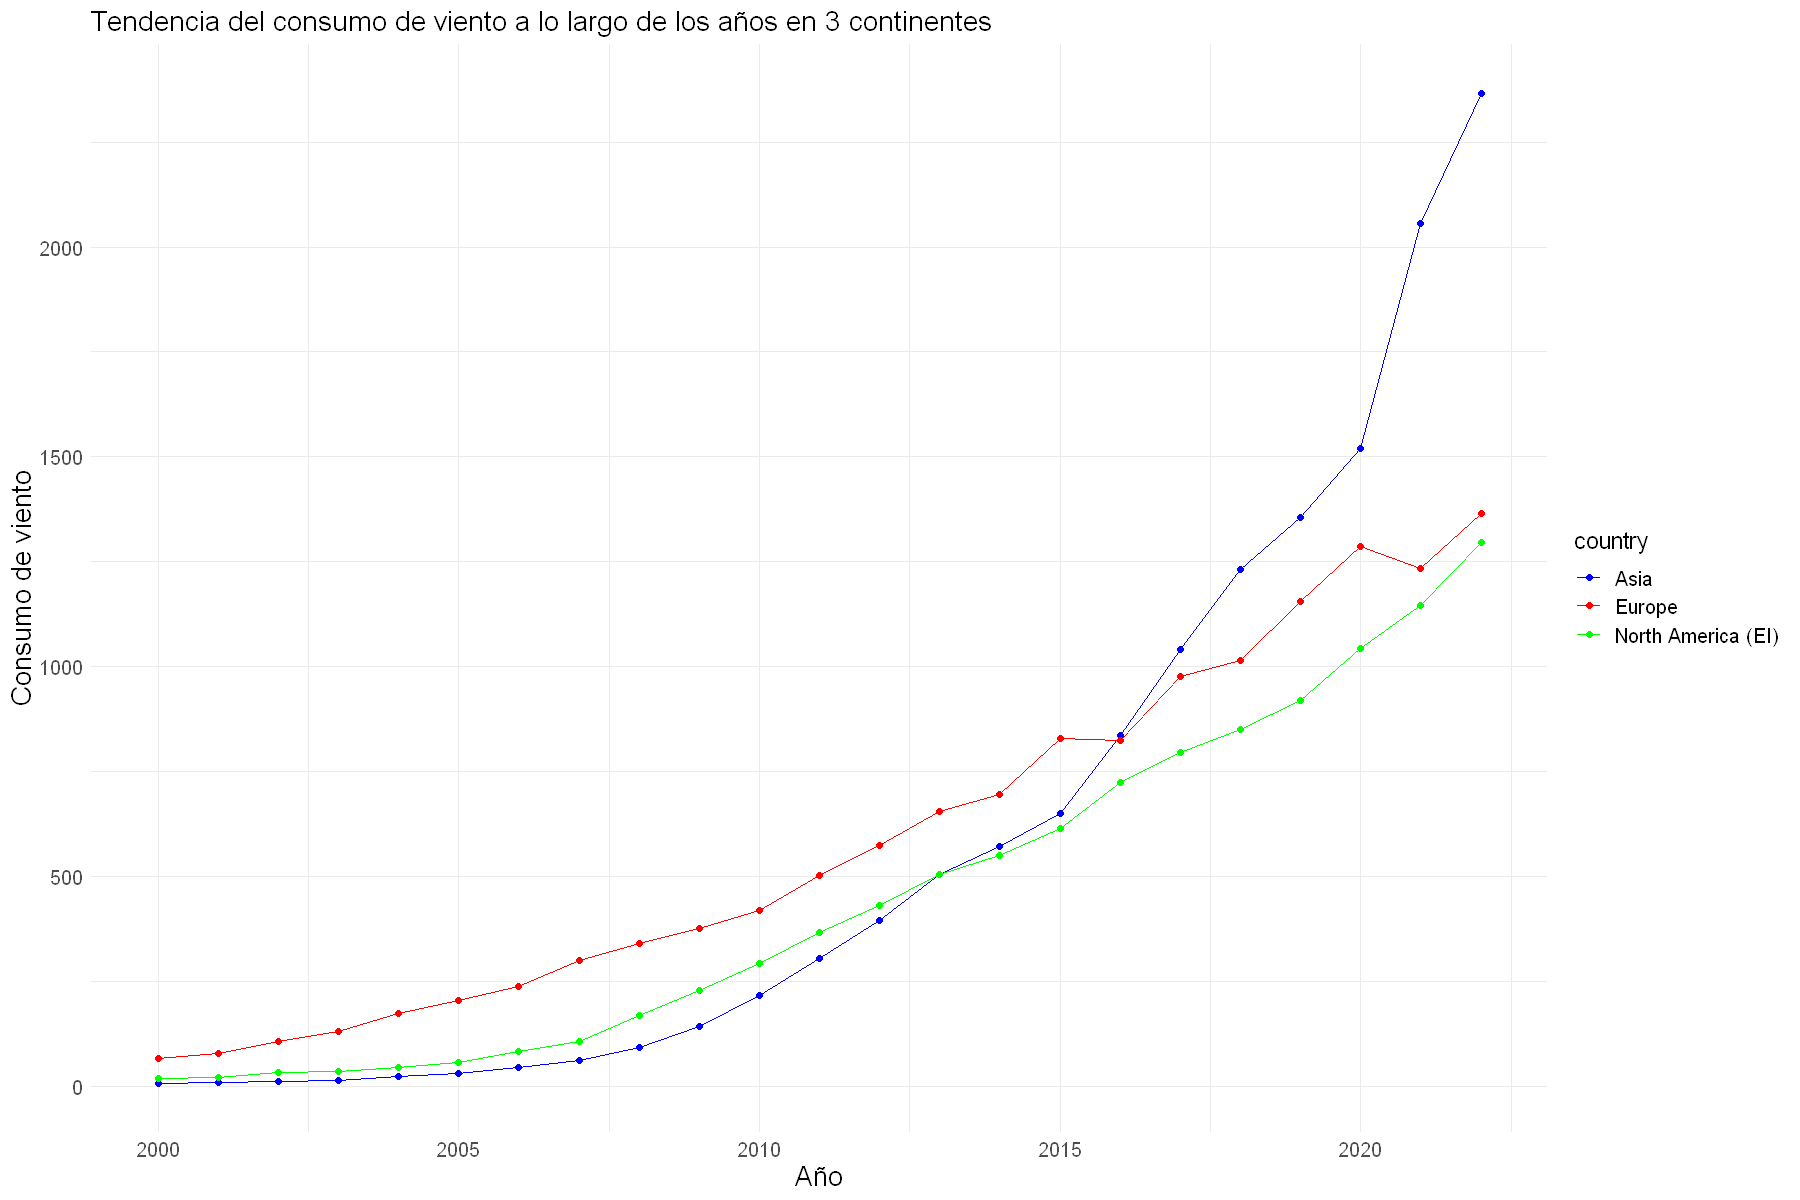

In [7]:
ggplot(rows_df, aes(x = year, y = wind_consumption, color = country)) +
  geom_line() +
  geom_point() + 
  labs(title = "Tendencia del consumo de viento a lo largo de los años en 3 continentes",
       x = "Año", y = "Consumo de viento") +
  scale_color_manual(values = c("Asia" = "blue", "Europe" = "red", "North America (EI)" = "green")) +
  theme_minimal() +
  theme(
    text = element_text(size = 14), 
    axis.title = element_text(size = 16), 
    axis.text = element_text(size = 12),  
    legend.title = element_text(size = 14), 
    legend.text = element_text(size = 12)  
  )

In [8]:
rows_df = rows_df %>% select(year, biofuel_consumption, country) %>% as_tsibble(index=year, regular = TRUE, key = country)
rows_df

year,biofuel_consumption,country
<dbl>,<dbl>,<chr>
2000,0.000,Asia
2001,0.000,Asia
2002,11.058,Asia
2003,13.620,Asia
2004,15.678,Asia
2005,19.186,Asia
2006,24.980,Asia
2007,29.120,Asia
2008,38.490,Asia


In [11]:
train_rows <- rows_df %>% select(biofuel_consumption) %>% filter_index("2000" ~ "2013")
test_rows <- rows_df %>% select(biofuel_consumption) %>% filter_index("2013" ~ "2014")
rows_df

year,biofuel_consumption,country
<dbl>,<dbl>,<chr>
2000,0.000,Asia
2001,0.000,Asia
2002,11.058,Asia
2003,13.620,Asia
2004,15.678,Asia
2005,19.186,Asia
2006,24.980,Asia
2007,29.120,Asia
2008,38.490,Asia


In [12]:
rows_df |>
  pivot_longer(c(biofuel_consumption, wind_consumption), names_to="Consumo") |>
  autoplot(value) +
  labs(y = "% change")

ERROR: [1m[33mError[39m in `pivot_longer()`:[22m
[33m![39m Can't subset columns that don't exist.
[31mx[39m Column `wind_consumption` doesn't exist.


In [13]:
rows_df |>
  ggplot(aes(x = biofuel_consumption, y = biofuel_electricity)) +
  labs(y = "biofuel_electricity (yearly % change)",
       x = "biofuel_consumption (yearly % change)") +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'biofuel_electricity' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . 

In [23]:
rows_df |>
  model(TSLM(biofuel_consumption ~ biofuel_electricity)) |>
  report()

ERROR: Error in UseMethod("model"): no applicable method for 'model' applied to an object of class "c('tbl_df', 'tbl', 'data.frame')"
